# Caeser cipher 

In [3]:
import math

math.log(26) / math.log(2)

4.700439718141093

## continuous order substitution

Plaintext Space : $26=2^{4.70}$

Key Space : $26=2^{4.70}$

Example Key:

| Original | a | b | c | d | e | f | g | h | i | j | k | l | m | n | o | p | q | r | s | t | u | v | w | x | y | z |
|----------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Cipher   | t | u | v | w | x | y | z | a | b | c | d | e | f | g | h | i | j | k | l | m | n | o | p | q | r | s |

issue : the key space too small


**Any secure encryption scheme must have a key space that is not
vulnerable to exhaustive search.**

## Mono-alphabetic substitution

Plaintext Space : $26=2^{4.70}$

Key Space : $26!\approx2^{88}$

Example Key:

| Original | a | b | c | d | e | f | g | h | i | j | k | l | m | n | o | p | q | r | s | t | u | v | w | x | y | z |
|----------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Cipher   | x | e | u | a | d | n | b | k | v | m | r | o | c | q | f | s | y | h | w | g | l | z | i | j | p | t |

Attact example

Average letter frequencies in the English language:

| a | b | c | d | e | f | g | h | i | j | k | l | m | n | o | p | q | r | s | t | u | v | w | x | y | z |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| 8.2 | 1.5 | 2.8 | 4.2 | 12.7 | 2.2 | 2.0 | 6.1 | 7.0 | 0.1 | 0.8 | 4.0 | 2.4 | 6.7 | 7.5 | 1.9 | 0.1 | 6.0 | 6.3 | 9.0 | 2.8 | 1.0 | 2.4 | 2.0 | 0.1 | 0.1 |

plaintext:

weconcludethatalthoughthemonoalphabeticcipherh
asaverylargekeyspaceitisstillcompletelyinsecur
ethisisanotherimportantlessonnamelyalthoughala
rgekeyspaceisnecessaryforanysecurecipheritisve
ryfarfrombeingsucient

ciphertext:

idufquoladgkxgxogkflbkgkdcfqfxoskxedgvuuvskdhk
xwxzdhpoxhbdrdpwsxudvgvwwgvooufcsodgdopvqwdulh
dgkvwvwxqfgkdhvcsfhgxqgodwwfqqxcdopxogkflbkxox
hbdrdpwsxudvwqdudwwxhpnfhxqpwdulhduvskdhvgvwzd
hpnxhnhfcedvqbwluvdqg

In [4]:
import numpy as np


In [5]:
from collections import Counter

text = """
We conclude that, although the mono-alphabetic cipher has a very large
key space, it is still completely insecure. This is another important lesson.
Namely, although a large key space is necessary for any secure cipher, it is
very far from being sucient.
"""
# Convert the text to lowercase and filter out non-letter characters
plaintext = [char for char in text.lower() if char.isalpha()]
print("".join(plaintext))
key = {
    "a": "x",
    "b": "e",
    "c": "u",
    "d": "a",
    "e": "d",
    "f": "n",
    "g": "b",
    "h": "k",
    "i": "v",
    "j": "m",
    "k": "r",
    "l": "o",
    "m": "c",
    "n": "q",
    "o": "f",
    "p": "s",
    "q": "y",
    "r": "h",
    "s": "w",
    "t": "g",
    "u": "l",
    "v": "z",
    "w": "i",
    "x": "j",
    "y": "p",
    "z": "t",
}

letter_counts = Counter(plaintext)

known_distribute_list = []
for letter, count in letter_counts.items():
    known_distribute_list.append((letter, count / len(plaintext) * 100))

known_distribute = np.array(known_distribute_list)

weconcludethatalthoughthemonoalphabeticcipherhasaverylargekeyspaceitisstillcompletelyinsecurethisisanotherimportantlessonnamelyalthoughalargekeyspaceisnecessaryforanysecurecipheritisveryfarfrombeingsucient


In [6]:
from collections import Counter

ciphertext = [key[char] for char in plaintext]
print("".join(ciphertext))
letter_counts = Counter(ciphertext)

statistics_distribute_list = []
for letter, count in letter_counts.items():
    statistics_distribute_list.append((letter, count / len(ciphertext) * 100))

statistics_distribute = np.array(statistics_distribute_list)

idufquoladgkxgxogkflbkgkdcfqfxoskxedgvuuvskdhkxwxzdhpoxhbdrdpwsxudvgvwwgvooufcsodgdopvqwdulhdgkvwvwxqfgkdhvcsfhgxqgodwwfqqxcdopxogkflbkxoxhbdrdpwsxudvwqdudwwxhpnfhxqpwdulhduvskdhvgvwzdhpnxhnhfcedvqbwluvdqg


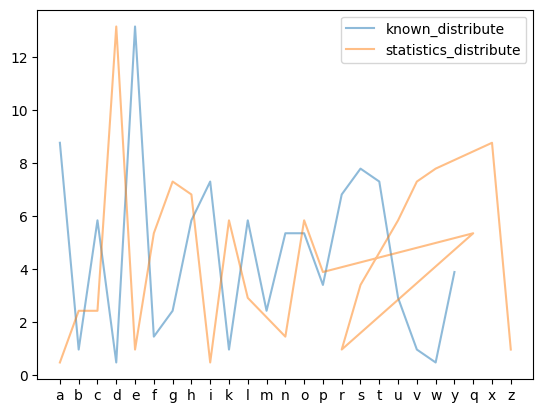

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Sort both arrays based on the first element of each tuple
known_distribute = known_distribute[known_distribute[:,0].argsort()]
statistics_distribute = statistics_distribute[statistics_distribute[:,0].argsort()]

# Create figure and axes
fig, ax = plt.subplots()

# Plot known_distribute
ax.plot(known_distribute[:,0], known_distribute[:,1].astype(float), alpha=0.5, label='known_distribute')

# Plot statistics_distribute
ax.plot(statistics_distribute[:,0], statistics_distribute[:,1].astype(float), alpha=0.5, label='statistics_distribute')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [8]:
# Sort both arrays based on the second element of each tuple
known_distribute = known_distribute[known_distribute[:,1].argsort()]
statistics_distribute = statistics_distribute[statistics_distribute[:,1].argsort()]

# Create a new array of tuples
combined = np.array(list(zip(statistics_distribute[:,0],known_distribute[:,0] )))

In [9]:
# Create a mapping dictionary
mapping = {original: mapped for original, mapped in combined}

guess_plaintext = "".join(mapping.get(letter, letter) for letter in ciphertext)

print(guess_plaintext)

weconcludethatalthoughthemonoalphaveticcipherhasakerylargebeyspaceitisstillcompletelyinsecurethisisanotherimportantlessonnamelyalthoughalargebeyspaceisnecessaryforanysecurecipheritiskeryfarfromveingsucient
